## metin temsili
- metni sayısal ya da başka bir formatta temsil etme işlemidir
- bilgisayarlar sayıları anlar
- kelime, cümle yapisi vs sayısala dönüştürülür
- feature engineering
- kelimelerin, cümlelerin özniteliklerine yoğunlaşırsın


## metin temsili yöntemleri
- Bag of words (BoW)
- TF-IDF (Term Frequency-Inverse Document Frequency)
- N-Gram Modelleri
- Word Embeddings
- Transformers Tabanlı

### Bag of Words (BoW)
- metindeki kelimeler sayısal verilere dönüştürerek metin analizini sağlar
- örnek
    - bugün hava güneşli. bugün hava sıcak. => bugün:1, hava:2, güneş:3, sıcak:4
    - [1,2,3] ve [1,2,4]

- yöntem:
    - benzersiz kelimelerden kelime kümesi oluştur => vocabulary
    - kelime frekansları hesaplanır => frequency
    - vektör ile temsil et

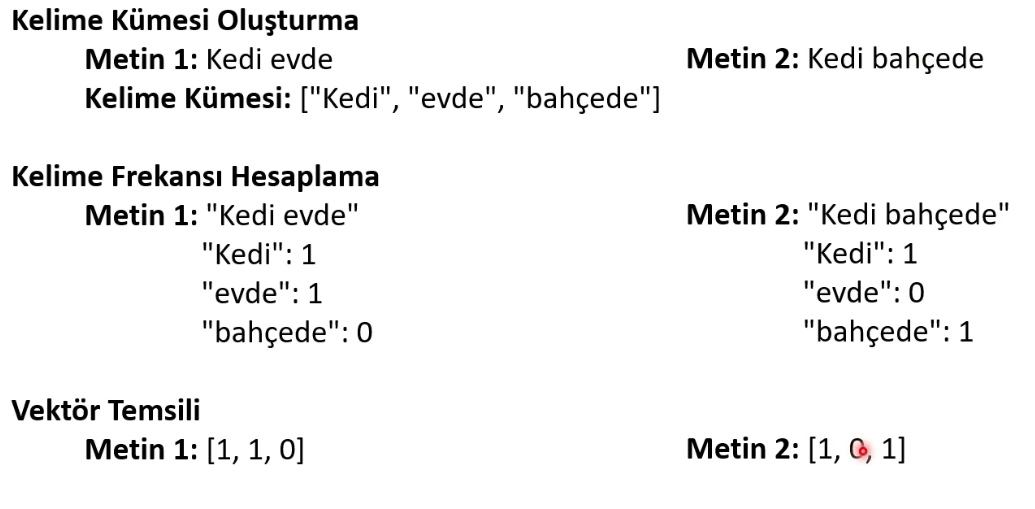

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ["kedi bahçede yok",
            "kedi evde yok",
            "kedi arabada"]

vectorizer = CountVectorizer()

#metni sayisal vectore çevir
X=vectorizer.fit_transform(documents)

# vocabulary oluşturma
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

vector = X.toarray()
print(vector)


['arabada' 'bahçede' 'evde' 'kedi' 'yok']
[[0 1 0 1 1]
 [0 0 1 1 1]
 [1 0 0 1 0]]


### TF-IDF
- TF => terim frekansı. bir kelimenin bir belgede ne kadar sık geçtiğini ölçer.
- IDF => ters döküman frekansı. bir kelimenin tüm belgelerdeki yaygınlığını ölçer. bir kelime ne kadar çok belgede geçiyorsa, o kelime çok bilgi sağlamaz.
- kelimelerin belgeler içinde ne kadar önemli olduğunu belirlemek için kullanılır
- formülde.. t => kelime, d => döküman, D => toplam döküman sayısı

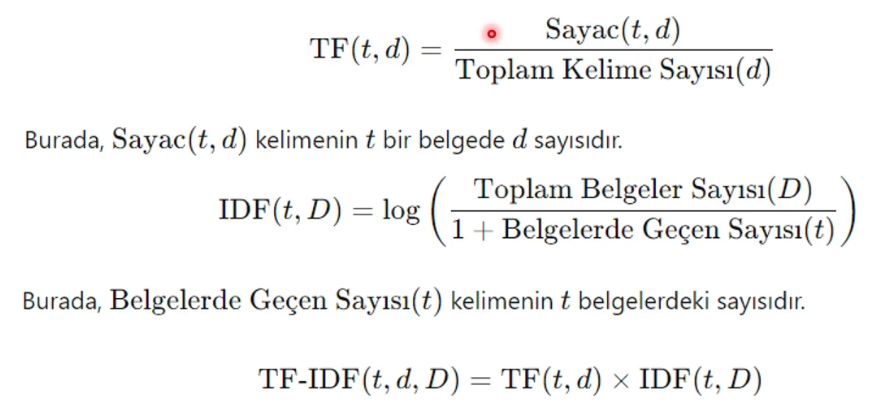

In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

documents = ["Bazı köpekler vahşidir.","Kediler ve kuşlar sevimlidir.","Inekler süt üretir.","Köpekler gıcıktır."]

tf_idf_vectorizer = TfidfVectorizer()
X = tf_idf_vectorizer.fit_transform(documents) 
feature_names = tf_idf_vectorizer.get_feature_names_out() 
vector = X.toarray() 
df_tf_idf = pd.DataFrame(vector,columns=feature_names)
df_tf_idf.head()


,bazı,gıcıktır,inekler,kediler,kuşlar,köpekler,sevimlidir,süt,vahşidir,ve,üretir
0,0.617614,0.000000,0.00000,0.0,0.0,0.486934,0.0,0.00000,0.617614,0.0,0.00000
1,0.000000,0.000000,0.00000,0.5,0.5,0.000000,0.5,0.00000,0.000000,0.5,0.00000
2,0.000000,0.000000,0.57735,0.0,0.0,0.000000,0.0,0.57735,0.000000,0.0,0.57735
3,0.000000,0.785288,0.00000,0.0,0.0,0.619130,0.0,0.00000,0.000000,0.0,0.00000


In [3]:
tf_idf = df_tf_idf.mean(axis=0)
print(tf_idf)

bazı          0.154404
gıcıktır      0.196322
inekler       0.144338
kediler       0.125000
kuşlar        0.125000
köpekler      0.276516
sevimlidir    0.125000
süt           0.144338
vahşidir      0.154404
ve            0.125000
üretir        0.144338
dtype: float64


### n-gram modelleri
- metinleri n karakterlik kısımlara bölüp analiz etmeyi sağlar
- 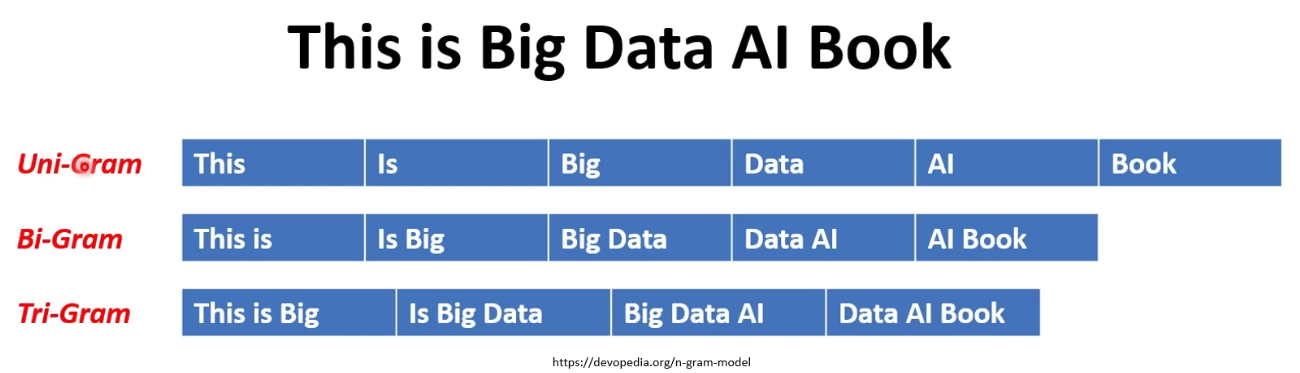

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ["This is big data artificial intelligence book","This is a NLP project"]

vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
vectorizer_trigram = CountVectorizer(ngram_range=(3,3))

X_unigram = vectorizer_unigram.fit_transform(documents)
unigram_features = vectorizer_unigram.get_feature_names_out()
print(f"unigram => {X_unigram.toarray()} \n {unigram_features} \n")

X_bigram = vectorizer_bigram.fit_transform(documents)
bigram_features = vectorizer_bigram.get_feature_names_out()
print(f"bigram => {X_bigram.toarray()} \n {bigram_features} \n")

X_trigram = vectorizer_trigram.fit_transform(documents)
trigram_features = vectorizer_trigram.get_feature_names_out()
print(f"unigram => {X_trigram.toarray()} \n {trigram_features} \n")

unigram => [[1 1 1 1 1 1 0 0 1]
 [0 0 0 0 0 1 1 1 1]] 
 ['artificial' 'big' 'book' 'data' 'intelligence' 'is' 'nlp' 'project'
 'this'] 

bigram => [[1 1 1 1 1 0 0 1]
 [0 0 0 0 0 1 1 1]] 
 ['artificial intelligence' 'big data' 'data artificial'
 'intelligence book' 'is big' 'is nlp' 'nlp project' 'this is'] 

unigram => [[1 1 1 1 0 1 0]
 [0 0 0 0 1 0 1]] 
 ['artificial intelligence book' 'big data artificial'
 'data artificial intelligence' 'is big data' 'is nlp project'
 'this is big' 'this is nlp'] 



### word embedding
- kelimelerin anlamlı bir temsille sayısal vektörlerle temsili
- bu temsilin hedefi kelimeler arasındaki anlamsal ve dilbilgisel ilişkileri yakalamak
- 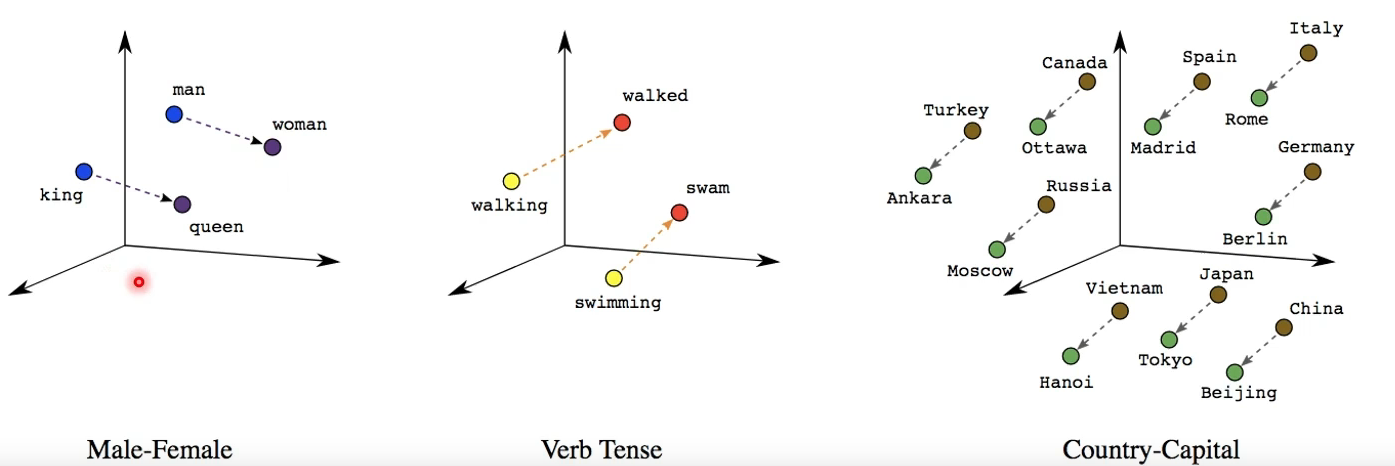
- özellikleri:
    - benzer anlamlara sahip kelimelerin vektörleri benzer olur
    - kelimeler arasında matematiksel işlemler yapılabilir
    - büyük veri kümesiyle eğitilir, kapsamlıdır.
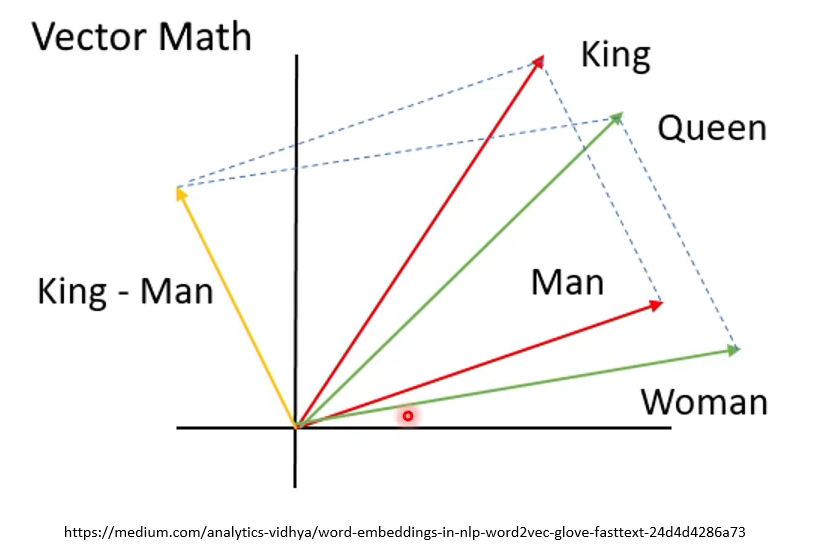

#### word embeddings modelleri
- word2vec => google tarasından geliştirilen, kelimeleri vektörlere dönüştüren ve bu vektörleri dildeki ilişkileri yakalayacak şekilde eğiten modeldir.
- GloVe => standford üni, kelime gömme temsillerini kelime ortaklıklarını yakalayacak şekilde hesaplar
- fastText => facebook, kelime gömme temsillerini kelime alt-birimlerini de dikkate alarak hesaplar

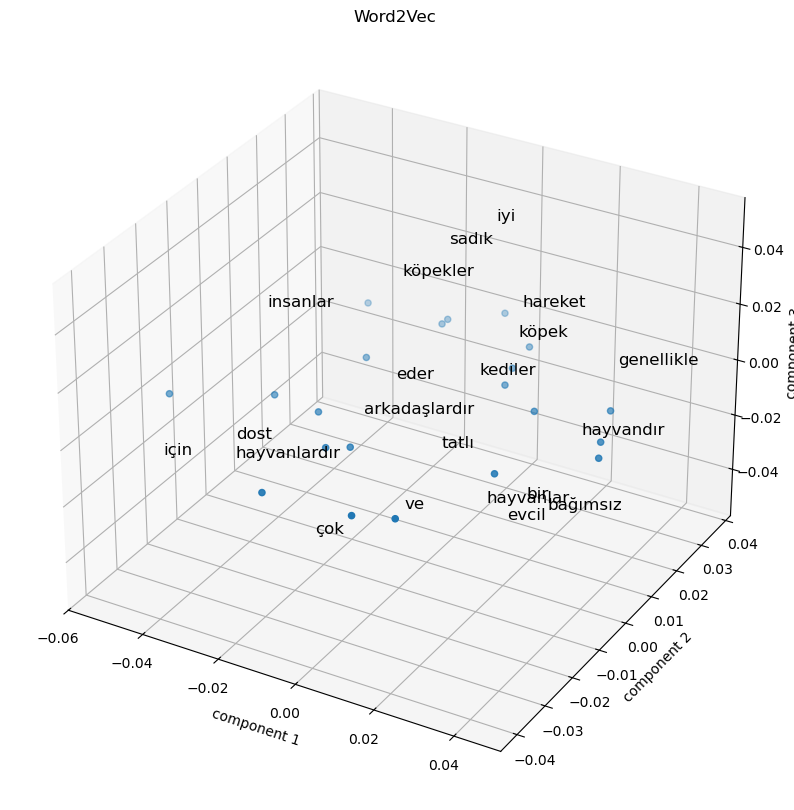

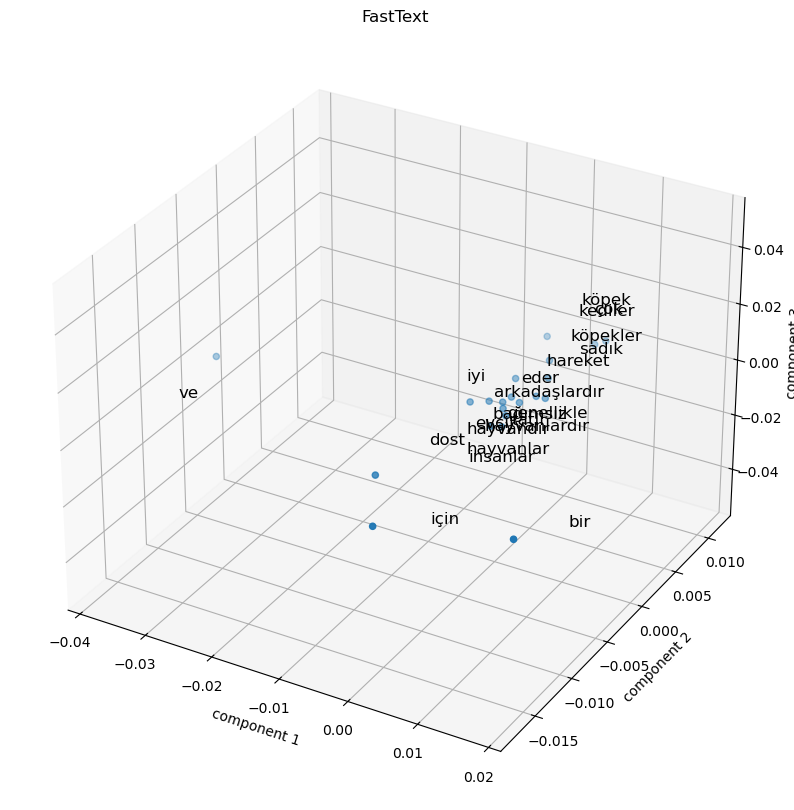

In [5]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from gensim.models import Word2Vec,FastText
from gensim.utils import simple_preprocess

import matplotlib.pyplot as plt

sentences = ["köpek çok tatlı bir hayvandır.",
             "köpekler evcil hayvanlardır.",
             "kediler genellikle bağımsız hareket eder.",
            "köpekler sadık ve dost hayvanlardır.",
            "hayvanlar insanlar için iyi arkadaşlardır."]

tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

w2v_model = Word2Vec(sentences=tokenized_sentences,vector_size=50,window=5,min_count=1,sg=0)

fasttext_model = FastText(sentences=tokenized_sentences,vector_size=50,window=5,min_count=1,sg=0)


def plot_word_embedding(model,title):
    word_vectors = model.wv
    
    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words]

    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111,projection="3d")
    ax.scatter(reduced_vectors[:,0],reduced_vectors[:,2])

    for i,word in enumerate(words):
        ax.text(reduced_vectors[i,0],reduced_vectors[i,1],reduced_vectors[i,2],word,fontsize=12)

    ax.set_title(title)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_zlabel("component 3")
    plt.show()

plot_word_embedding(w2v_model,"Word2Vec")
plot_word_embedding(fasttext_model,"FastText")


### transforming
- attention is all you need
- bağlamı daha iyi anlar
- paralel işleme yeteneği var
- çeşitli nlp görevlerinde kullanılır
- transfer learning i sağlar (önceden eğitilmiş modeller fine tuning ile kullanılır)
- bilinen transformers modelleri
    - bert
    - gpt
- attention
    - modelin belirli girdi parçalarına farklı derecelerde dikkat göstermesi
    - dikkat skoru
- input embedding
    - girdi verilerini modelin işleyebileceği bir formata çevirir.. word2vec, GloVe,bert
- multi-head attention
    - her başlık farklı bir açıya odaklanır.. head1-> anlam ilişkisi, head2 -> gramer ilişkisi vs.. gibi
- masked multi-head attention
    - gelecekteki kelimeleri görmesini engelleme
- add & norm
- feed-forward network
- output embedding
- 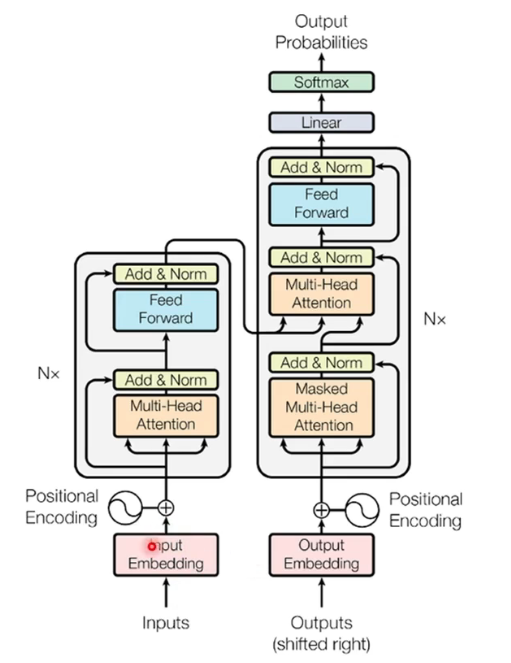

In [7]:
from transformers import AutoTokenizer, AutoModel
import torch

import warnings
warnings.filterwarnings("ignore")

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModel.from_pretrained(model_name)

text = "transformers can be used for natural language processing."
 
inputs = tokenizer(text,return_tensors="pt")

with torch.no_grad(): # gradyan hesaplanmasi durdurulur, verimli bellek kullanimi icin
    outputs = model(**inputs)

last_hidden_state = outputs.last_hidden_state

first_token_embedding = last_hidden_state[0,0,:].numpy()

print(f"metin temsili : {first_token_embedding}")



metin temsili : [-4.13362026e-01 -4.34312522e-01 -1.72681853e-01  7.21630827e-03
 -6.71185493e-01 -2.18304902e-01  3.21576238e-01  3.56223881e-01
  4.21759412e-02 -1.12310335e-01 -2.82338798e-01 -1.50698110e-01
 -3.71226400e-01  2.27446556e-01 -2.76961774e-01 -7.96794072e-02
 -4.18978959e-01  7.69331515e-01  1.00771964e-01  3.38926941e-01
 -2.19528496e-01 -4.96320963e-01  4.34716582e-01  3.61914262e-02
 -4.33190651e-02 -3.68511021e-01  1.20228522e-01 -2.06348091e-01
 -2.87829697e-01  5.80404922e-02 -7.20632017e-01  3.49332541e-01
 -3.22493047e-01 -4.99244511e-01  8.08336854e-01 -1.36023983e-01
  1.33978948e-01 -4.87130284e-01 -1.20964125e-02  1.30039111e-01
 -3.88841540e-01 -1.37704045e-01  4.05708849e-01 -2.35100724e-02
 -6.74936652e-01  2.03981519e-01 -3.17738366e+00 -5.01189306e-02
 -6.42712414e-01 -2.52293617e-01 -1.55038461e-01  2.31333733e-01
  1.07638910e-02  5.29300511e-01  2.24992573e-01  4.34818298e-01
 -9.49752256e-02  8.26392472e-02  3.99467081e-01  4.72430766e-01
  1.73008

### metin temsili yöntemlerinin karşılaştırılması
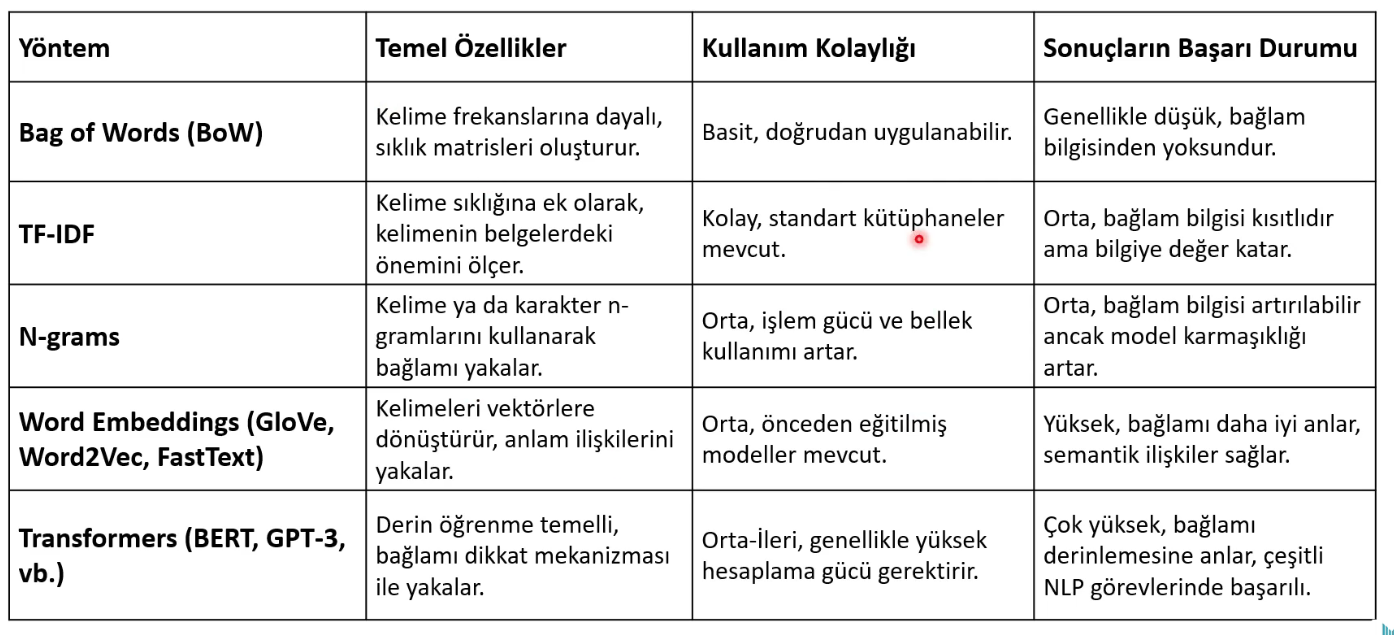

